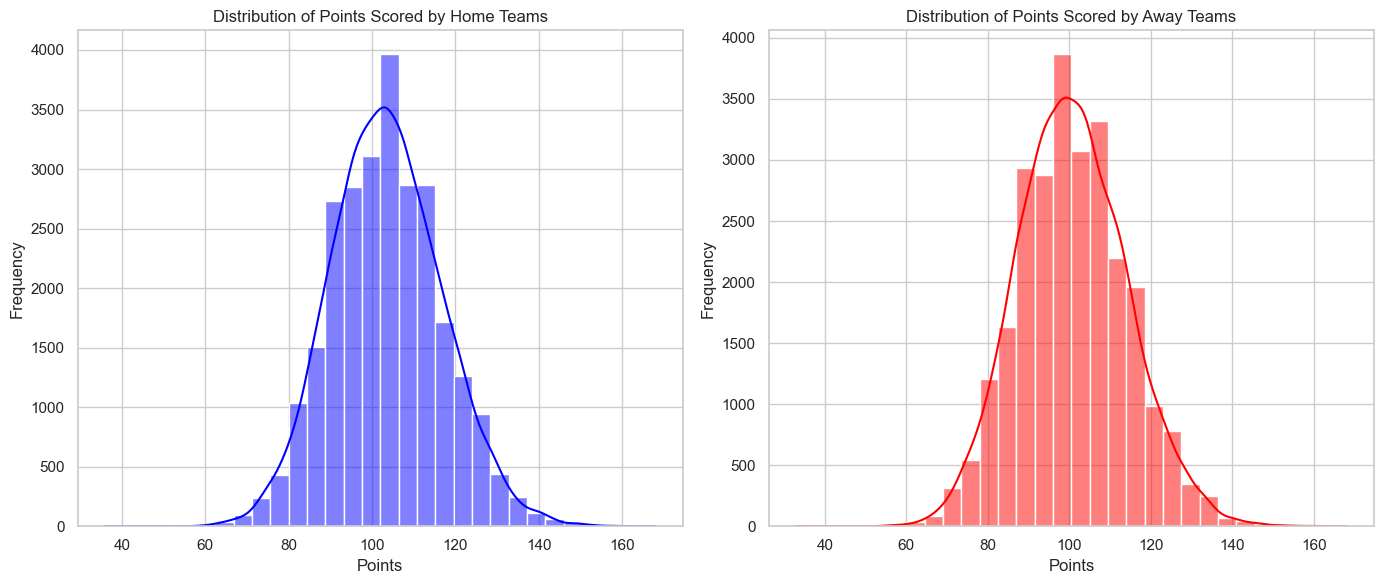

In [19]:
### The EDA ###
### Graph 1 ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('games.csv')

# Setting up the visual style
sns.set(style="whitegrid")

#distribution of points scored by home and away teams
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['PTS_home'].dropna(), kde=True, color='blue', bins=30)
plt.title('Distribution of Points Scored by Home Teams')
plt.xlabel('Points')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['PTS_away'].dropna(), kde=True, color='red', bins=30)
plt.title('Distribution of Points Scored by Away Teams')
plt.xlabel('Points')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/var/folders/s7/rs36hn6n49sd62s0yf6rmr_r0000gn/T/ipykernel_34768/1109160293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home Wins', 'Home Losses'], y=[home_win_rate, 1 - home_win_rate], palette='coolwarm')


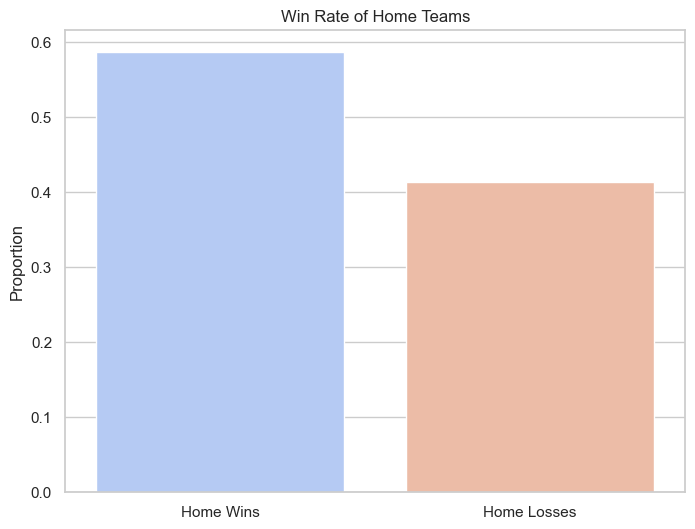

In [14]:
### Graph 2 ###
# Win rate of home teams
home_win_rate = df['HOME_TEAM_WINS'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Home Wins', 'Home Losses'], y=[home_win_rate, 1 - home_win_rate], palette='coolwarm')
plt.title('Win Rate of Home Teams')
plt.ylabel('Proportion')
plt.show()

/var/folders/s7/rs36hn6n49sd62s0yf6rmr_r0000gn/T/ipykernel_34768/474756936.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_teams_df['TEAM_NAME'] = top_10_teams_df['HOME_TEAM_ID'].map(team_id_to_name)


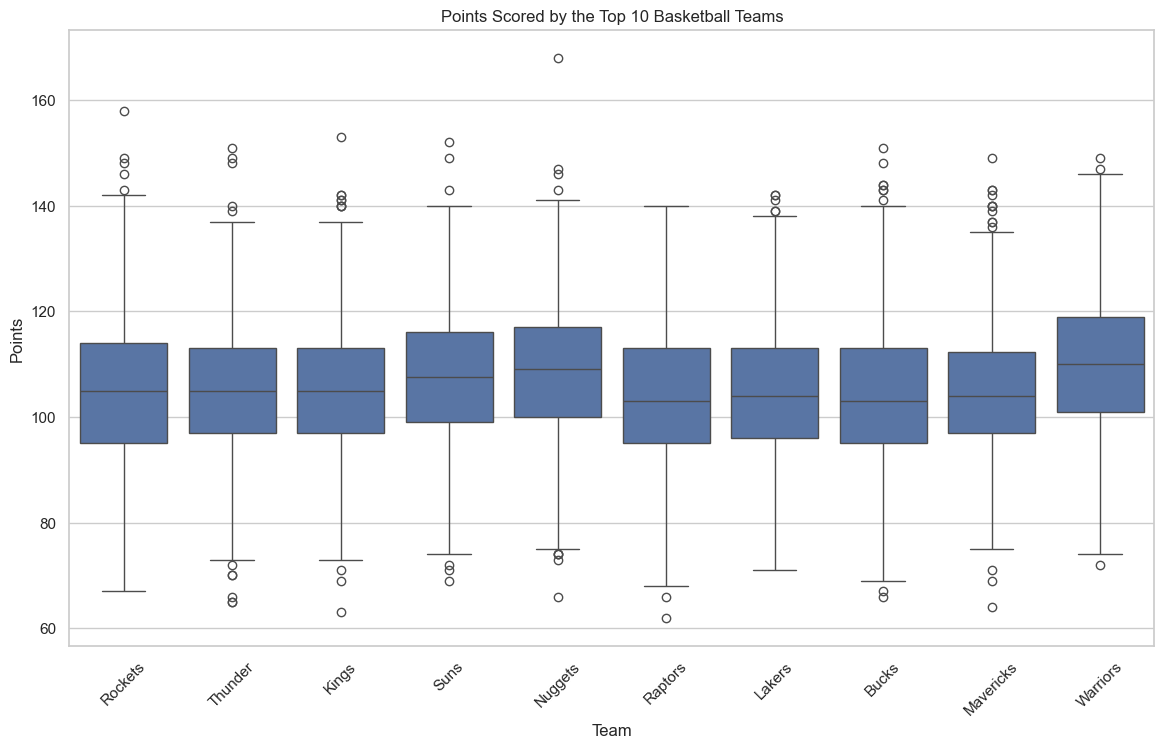

In [15]:
### Graph 3 ###
#calculate the average points scored by each team
team_avg_points = df.groupby('HOME_TEAM_ID')['PTS_home'].mean().sort_values(ascending=False).head(10)

#get the IDs of the top 10 teams
top_10_teams = team_avg_points.index.tolist()

#filter the dataset for games involving the top 10 teams
top_10_teams_df = df[df['HOME_TEAM_ID'].isin(top_10_teams)]

#create a box plot for the points scored by the top 10 teams
plt.figure(figsize=(14, 8))

#create a mapping of team IDs to team names for better readability
team_id_to_name = {
    1610612737: 'Hawks', 1610612738: 'Celtics', 1610612739: 'Cavaliers', 1610612740: 'Pelicans', 1610612741: 'Bulls', 
    1610612742: 'Mavericks', 1610612743: 'Nuggets', 1610612744: 'Warriors', 1610612745: 'Rockets', 1610612746: 'Clippers', 
    1610612747: 'Lakers', 1610612748: 'Heat', 1610612749: 'Bucks', 1610612750: 'Timberwolves', 1610612751: 'Nets', 
    1610612752: 'Knicks', 1610612753: 'Magic', 1610612754: 'Pacers', 1610612755: '76ers', 1610612756: 'Suns', 
    1610612757: 'Trail Blazers', 1610612758: 'Kings', 1610612759: 'Spurs', 1610612760: 'Thunder', 1610612761: 'Raptors', 
    1610612762: 'Jazz', 1610612763: 'Grizzlies', 1610612764: 'Wizards', 1610612765: 'Pistons', 1610612766: 'Hornets'
}

top_10_teams_df['TEAM_NAME'] = top_10_teams_df['HOME_TEAM_ID'].map(team_id_to_name)

#plot boxplot
sns.boxplot(x='TEAM_NAME', y='PTS_home', data=top_10_teams_df)
plt.title('Points Scored by the Top 10 Basketball Teams')
plt.xlabel('Team')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()


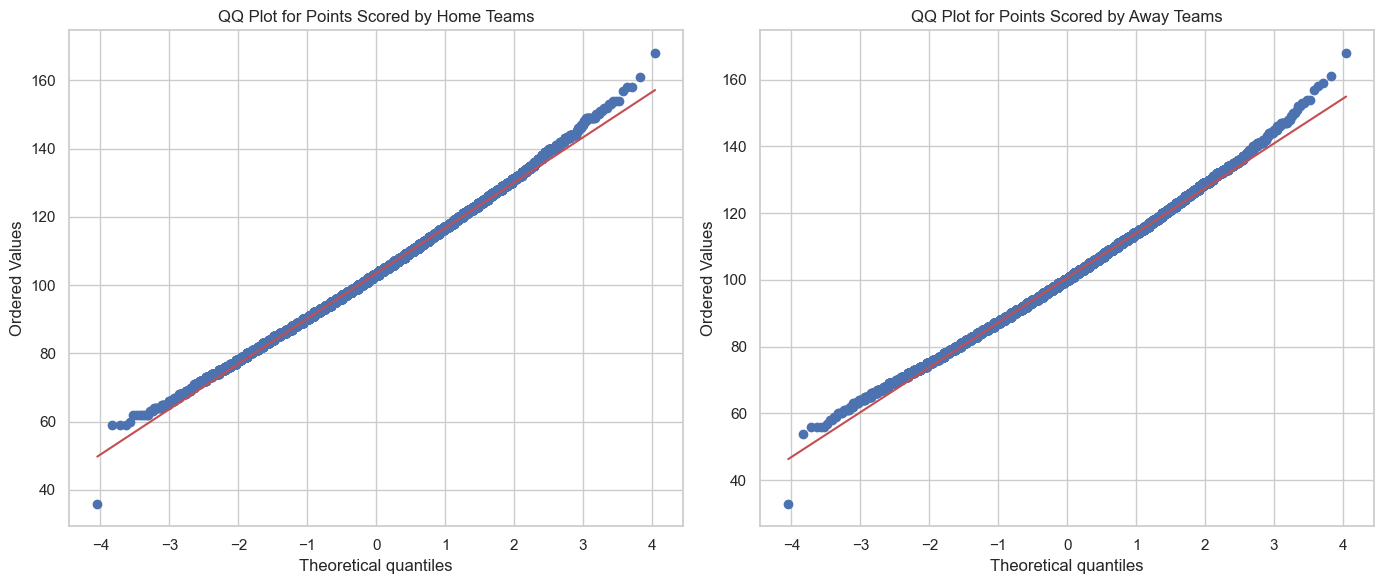

/var/folders/s7/rs36hn6n49sd62s0yf6rmr_r0000gn/T/ipykernel_34768/838241620.py:20: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26552.
  shapiro_test_home = stats.shapiro(df['PTS_home'].dropna())
/var/folders/s7/rs36hn6n49sd62s0yf6rmr_r0000gn/T/ipykernel_34768/838241620.py:21: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26552.
  shapiro_test_away = stats.shapiro(df['PTS_away'].dropna())


(ShapiroResult(statistic=0.9977527715673074, pvalue=4.1674646954982985e-19),
 ShapiroResult(statistic=0.9974979030804233, pvalue=2.850930994747766e-20))

In [16]:
### Graph 4 ###
import scipy.stats as stats

#QQ plot for points scored by home teams
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['PTS_home'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot for Points Scored by Home Teams')

#QQ plot for points scored by away teams
plt.subplot(1, 2, 2)
stats.probplot(df['PTS_away'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot for Points Scored by Away Teams')

plt.tight_layout()
plt.show()

#Shapiro-Wilk test for normality
shapiro_test_home = stats.shapiro(df['PTS_home'].dropna())
shapiro_test_away = stats.shapiro(df['PTS_away'].dropna())

shapiro_test_home, shapiro_test_away


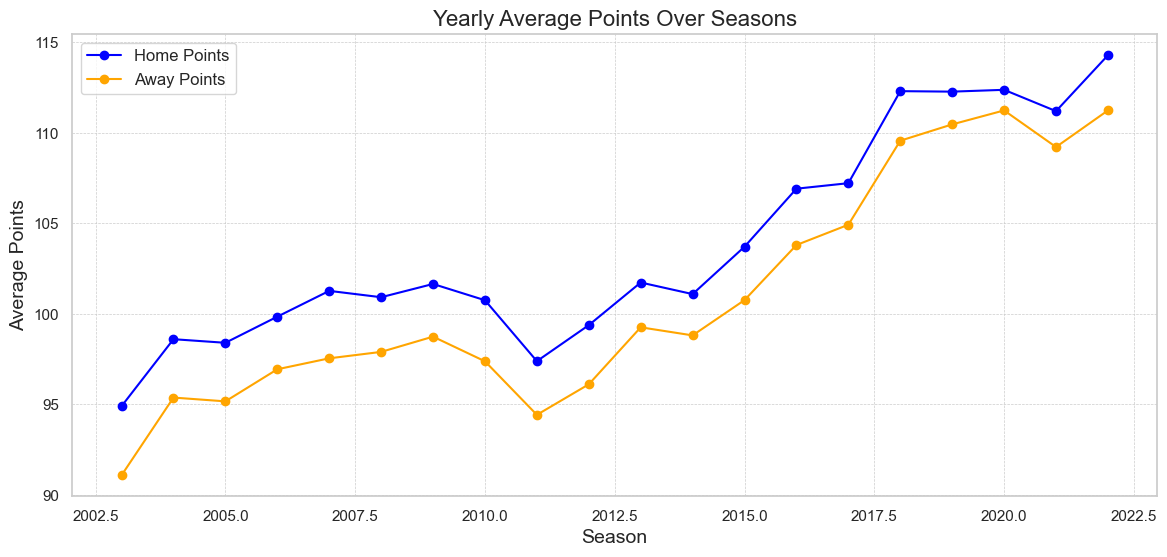

In [18]:
### Graph 5 ###
#group by season and calculate the mean points for home and away teams
yearly_avg_points = df.groupby('SEASON')[['PTS_home', 'PTS_away']].mean()

#create the figure and axis with proper formatting
fig, ax = plt.subplots(figsize=(14, 6))

#plot the data
ax.plot(yearly_avg_points.index, yearly_avg_points['PTS_home'], marker='o', label='Home Points', color='blue')
ax.plot(yearly_avg_points.index, yearly_avg_points['PTS_away'], marker='o', label='Away Points', color='orange')
ax.set_title('Yearly Average Points Over Seasons', fontsize=16)
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Average Points', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.show()
